#### **Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score,
    confusion_matrix, RocCurveDisplay
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from imblearn.over_sampling import SMOTE
import pickle

#### **Load Dataset**

In [4]:
columns = [
    'duration','protocol_type','service','flag','src_bytes','dst_bytes','land',
    'wrong_fragment','urgent','hot','num_failed_logins','logged_in',
    'num_compromised','root_shell','su_attempted','num_root','num_file_creations',
    'num_shells','num_access_files','num_outbound_cmds','is_host_login',
    'is_guest_login','count','srv_count','serror_rate','srv_serror_rate',
    'rerror_rate','srv_rerror_rate','same_srv_rate','diff_srv_rate',
    'srv_diff_host_rate','dst_host_count','dst_host_srv_count',
    'dst_host_same_srv_rate','dst_host_diff_srv_rate',
    'dst_host_same_src_port_rate','dst_host_srv_diff_host_rate',
    'dst_host_serror_rate','dst_host_srv_serror_rate','dst_host_rerror_rate',
    'dst_host_srv_rerror_rate','class','level'
]

train_data = pd.read_csv("/workspaces/SentinelNet/data/KDDTrain+.txt", header=None, names=columns)
test_data  = pd.read_csv("/workspaces/SentinelNet/data/KDDTest+.txt", header=None, names=columns)

print("Train Shape:", train_data.shape)
print("Test Shape:", test_data.shape)

print("\nTrain dataset dataset:\n")
print(train_data.head())

print("\nTrain dataset info:\n")
print(train_data.info())

print("\nTrain dataset class distribution:\n")
print(train_data['class'].value_counts())

Train Shape: (125973, 43)
Test Shape: (22544, 43)

Train dataset dataset:

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   wrong_fragment  urgent  hot  ...  dst_host_same_srv_rate  \
0               0       0    0  ...                    0.17   
1               0       0    0  ...                    0.00   
2               0       0    0  ...                    0.10   
3               0       0    0  ...                    1.00   
4               0       0    0  ...                    1.00   

   dst_host_diff_srv_rate  dst_host_same_src_port_rate  \
0                    0.03                         0.17 

#### **Data Claening**

In [13]:
print("Train Dataset Missing values:", train_data.isnull().sum().sum())
print("Train Dataset Duplicates:", train_data.duplicated().sum())
print("Test Dataset Missing values:", train_data.isnull().sum().sum())
print("Test Dataset Duplicates:", train_data.duplicated().sum())
train_data.drop_duplicates(inplace=True)
test_data.drop_duplicates(inplace=True)

Train Dataset Missing values: 0
Train Dataset Duplicates: 0
Test Dataset Missing values: 0
Test Dataset Duplicates: 0


#### **EDA - Binary Labels**

In [5]:
train_data['binary_label'] = train_data['class'].apply(lambda x: 0 if x=="normal" else 1)
test_data['binary_label']  = test_data['class'].apply(lambda x: 0 if x=="normal" else 1)

/tmp/ipykernel_11134/1492098115.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="binary_label", data=train_data, palette="Set2")


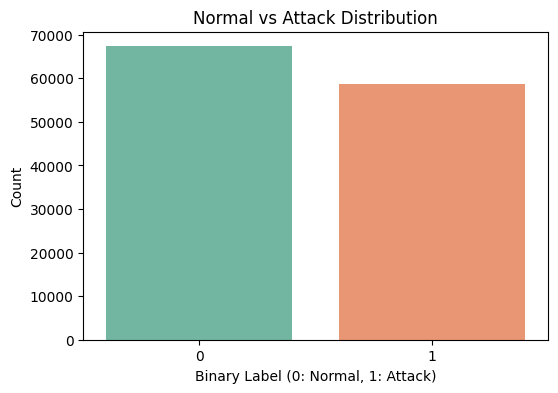

/tmp/ipykernel_11134/1492098115.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=train_data, order=train_data['class'].value_counts().index[:15], palette="Set3")


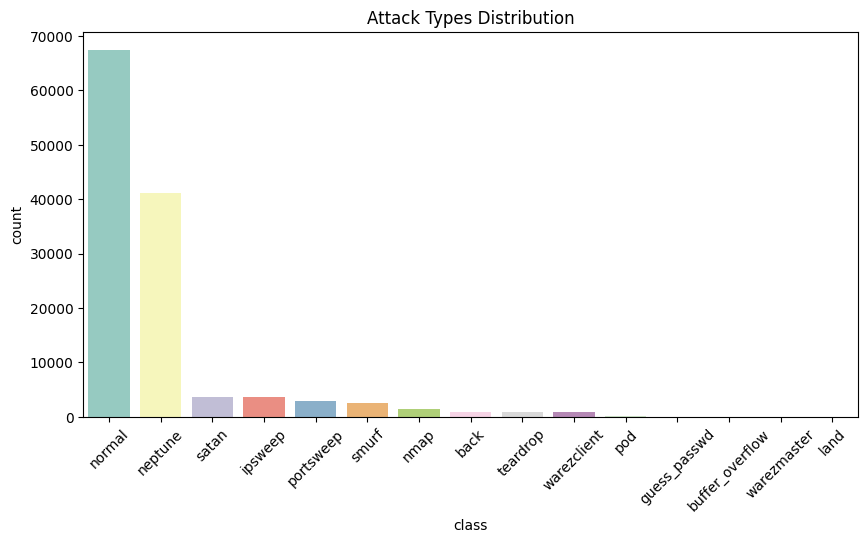

/tmp/ipykernel_11134/1492098115.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="protocol_type", data=train_data, palette="Set1")


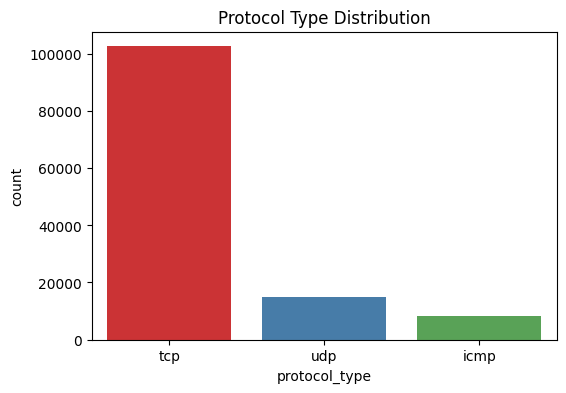

/tmp/ipykernel_11134/1492098115.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="service", data=train_data, order=train_data['service'].value_counts().index[:20], palette="Set1")


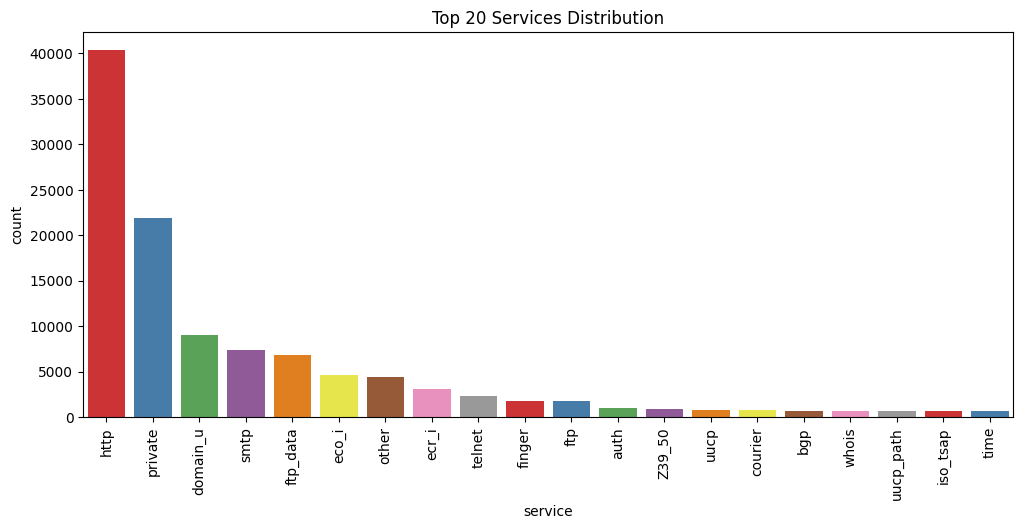

/tmp/ipykernel_11134/1492098115.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="flag", data=train_data, palette="Set2")


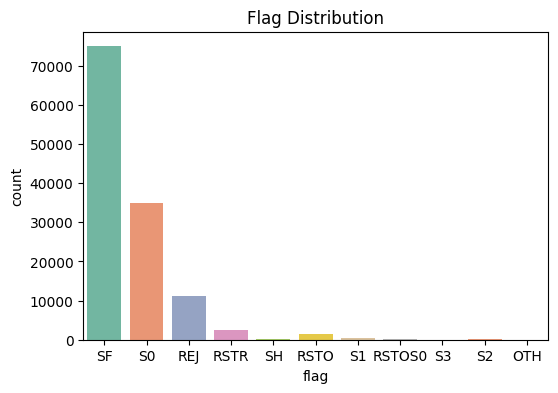

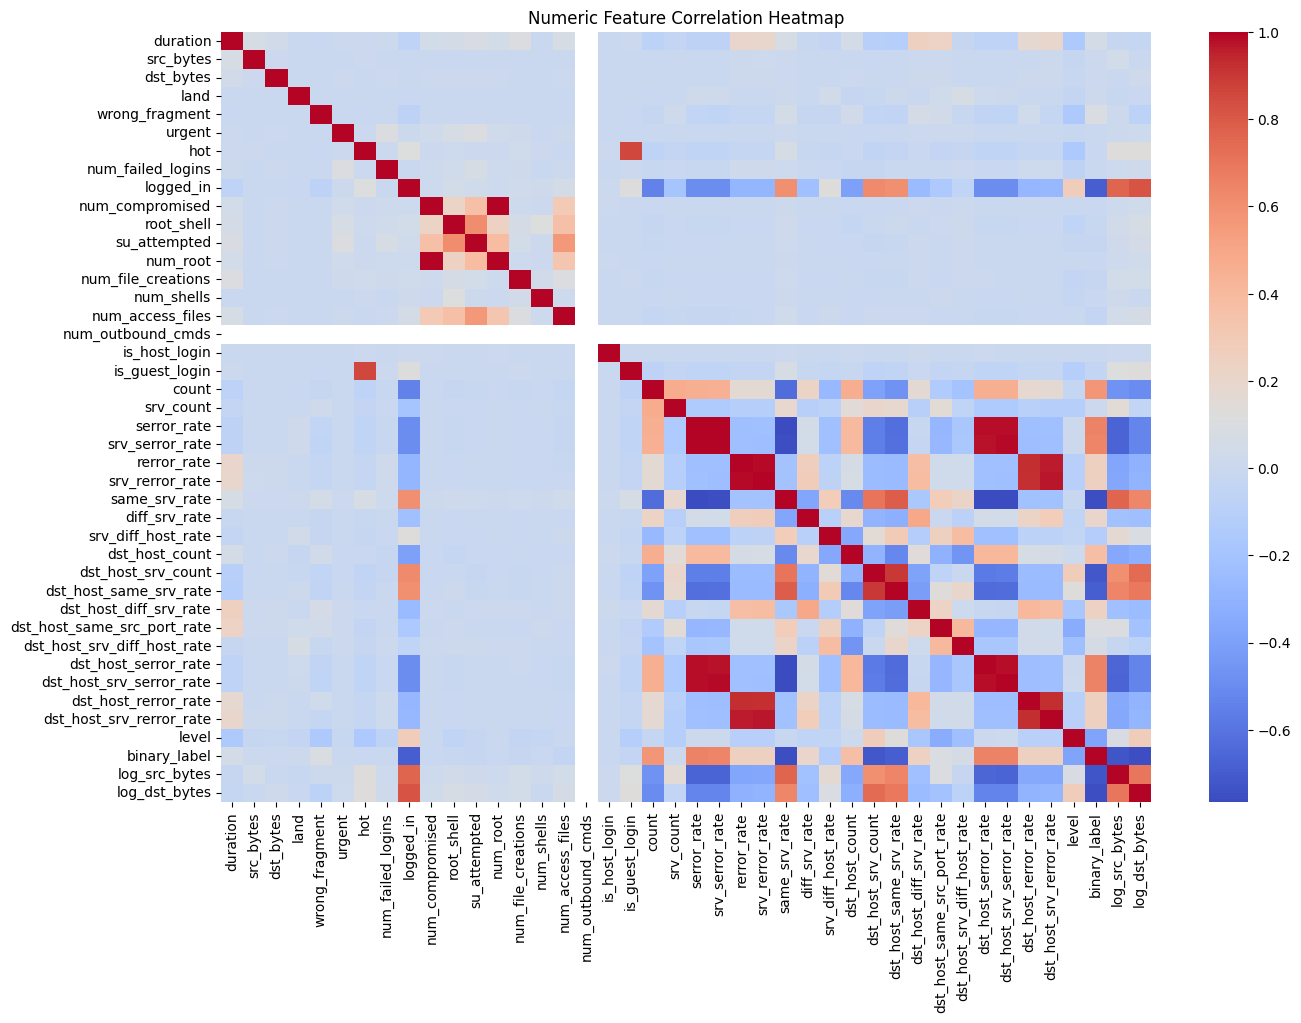

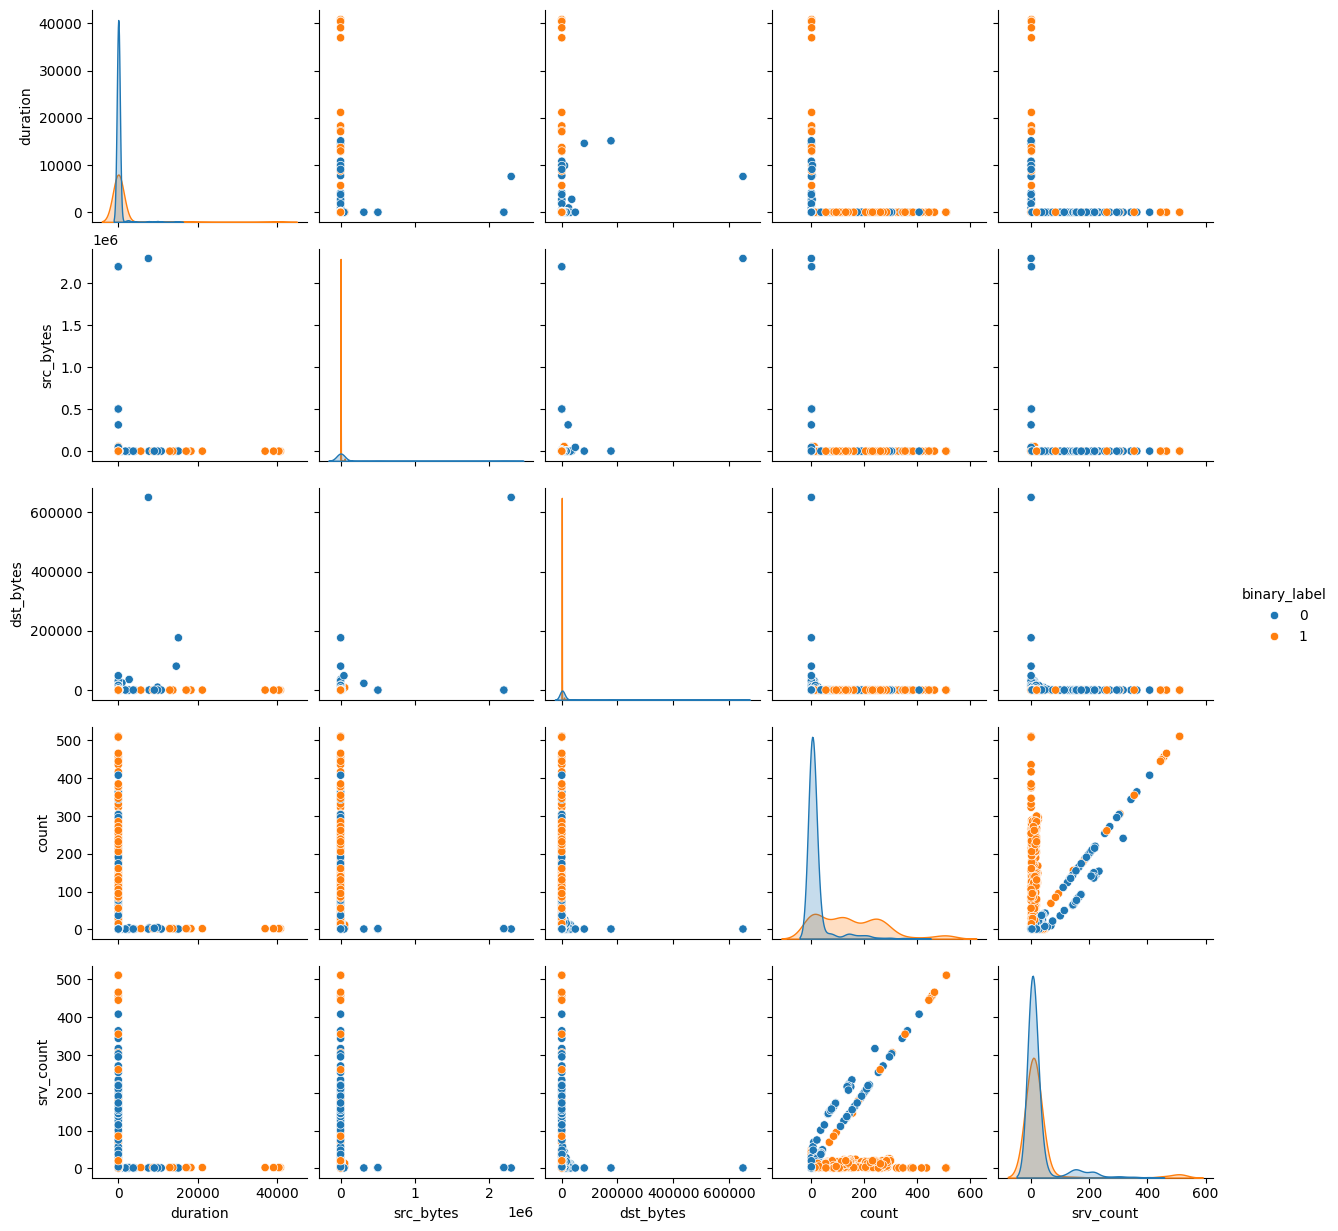

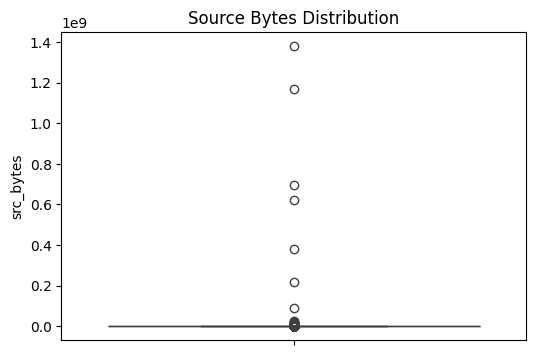

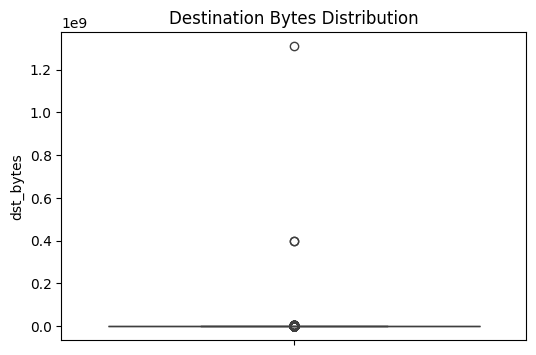

/tmp/ipykernel_11134/1492098115.py:70: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="attack_cat", data=train_data, palette="Set2")


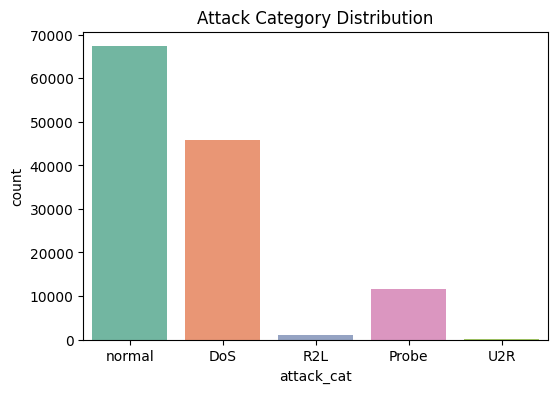

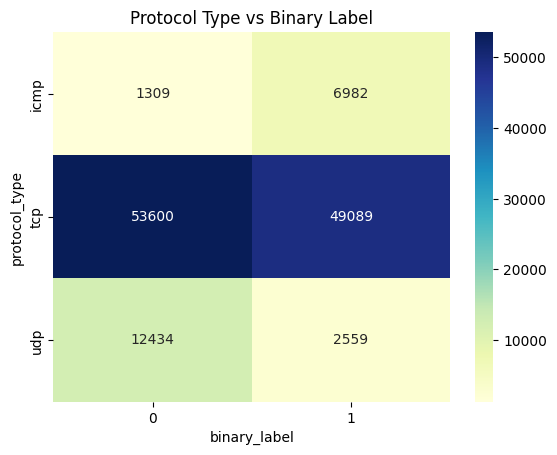

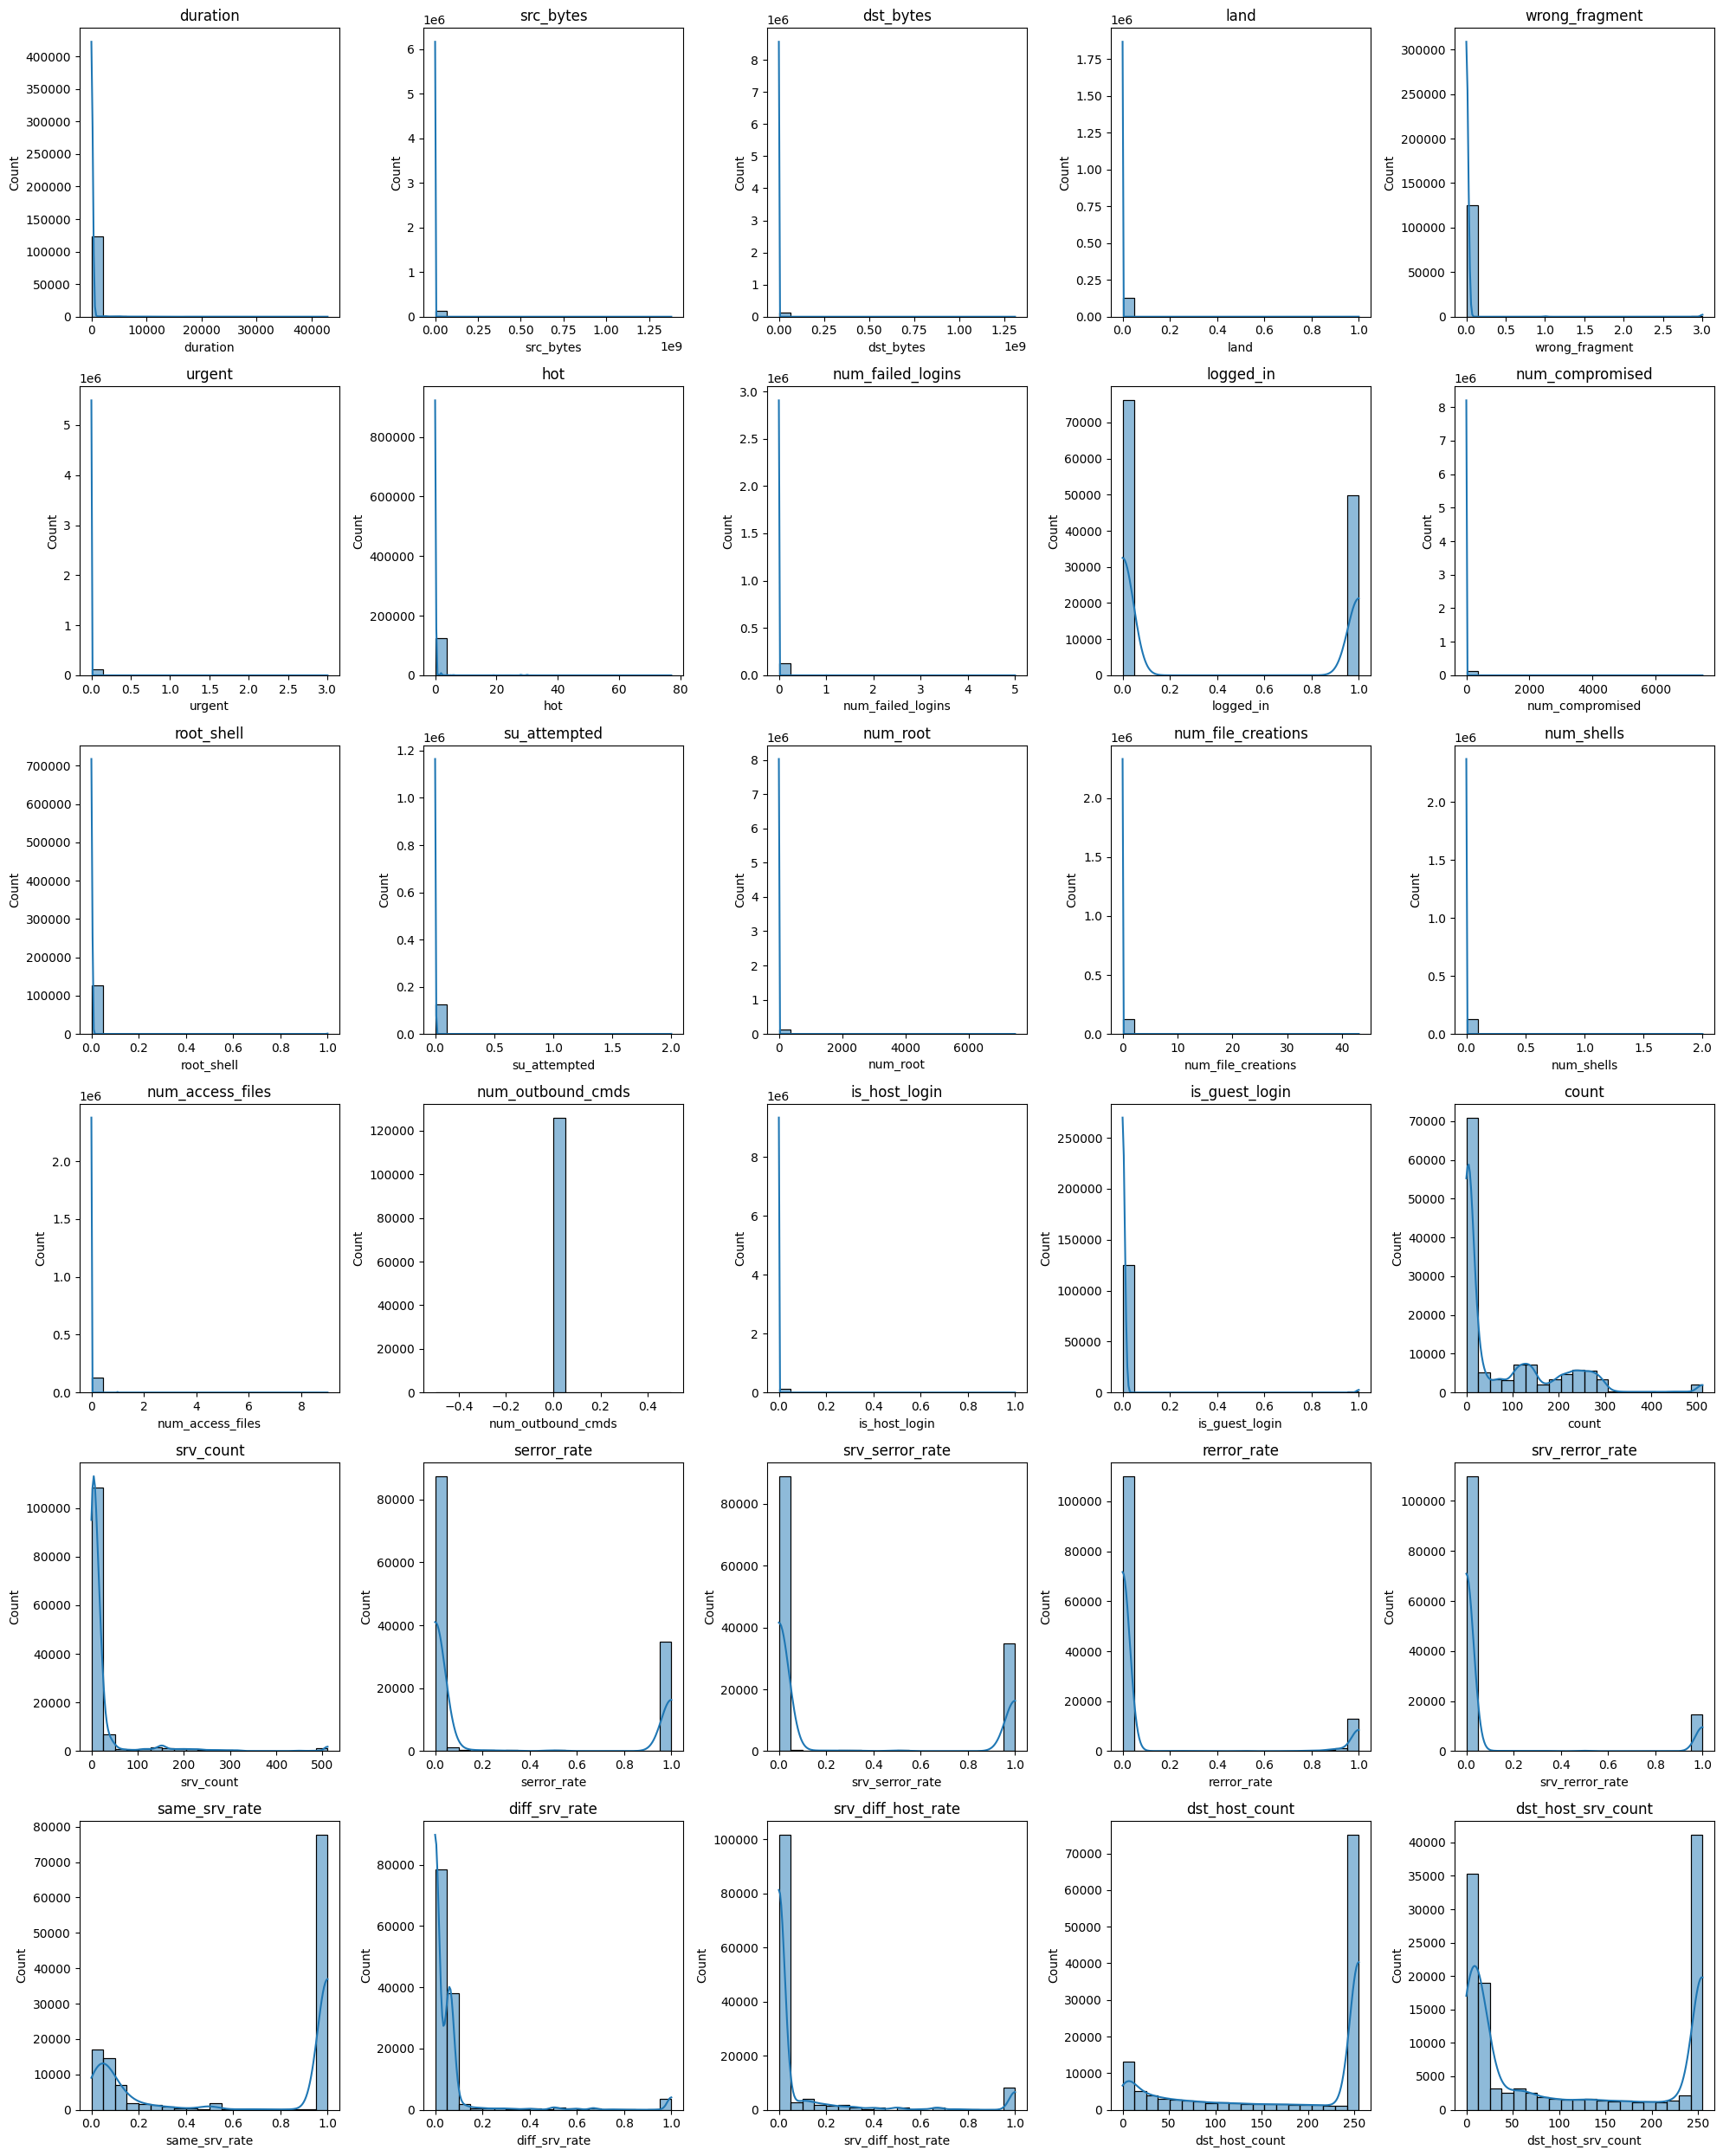

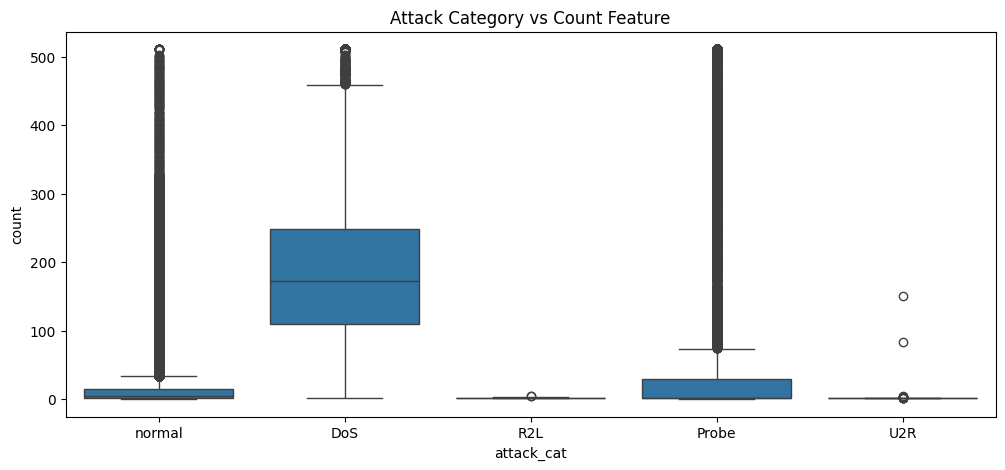

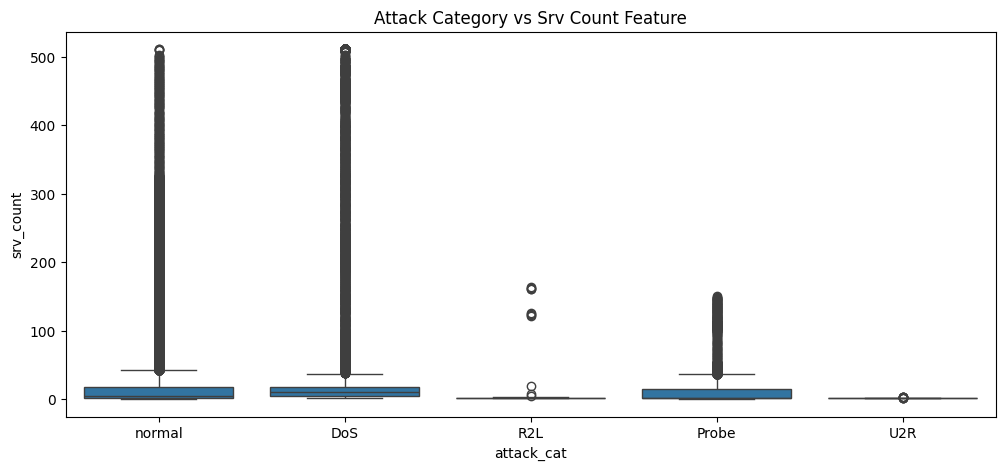

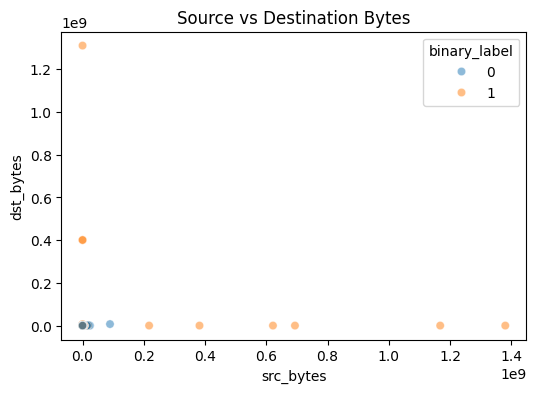

In [11]:
# 6.1 Class Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="binary_label", data=train_data, palette="Set2")
plt.title("Normal vs Attack Distribution")
plt.xlabel("Binary Label (0: Normal, 1: Attack)")
plt.ylabel("Count")
plt.show()

# 6.2 Multi-Class Attack Distribution
plt.figure(figsize=(10,5))
sns.countplot(x="class", data=train_data, order=train_data['class'].value_counts().index[:15], palette="Set3")
plt.xticks(rotation=45)
plt.title("Attack Types Distribution")
plt.show()

# 6.3 Protocol Type Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="protocol_type", data=train_data, palette="Set1")
plt.title("Protocol Type Distribution")
plt.show()

# 6.4 Service Distribution
plt.figure(figsize=(12,5))
sns.countplot(x="service", data=train_data, order=train_data['service'].value_counts().index[:20], palette="Set1")
plt.xticks(rotation=90)
plt.title("Top 20 Services Distribution")
plt.show()

# 6.5 Flag Distribution
plt.figure(figsize=(6,4))
sns.countplot(x="flag", data=train_data, palette="Set2")
plt.title("Flag Distribution")
plt.show()

# 6.6 Numeric Feature Correlation Heatmap
plt.figure(figsize=(15,10))
sns.heatmap(train_data.corr(numeric_only=True), cmap="coolwarm")
plt.title("Numeric Feature Correlation Heatmap")
plt.show()

# 6.7 Pairplot (Sample 1000 rows for speed)
sns.pairplot(train_data.sample(1000), hue="binary_label", vars=['duration','src_bytes','dst_bytes','count','srv_count'])
plt.show()

# 6.8 Boxplot - Src Bytes
plt.figure(figsize=(6,4))
sns.boxplot(y=train_data['src_bytes'])
plt.title("Source Bytes Distribution")
plt.show()

# 6.9 Boxplot - Dst Bytes
plt.figure(figsize=(6,4))
sns.boxplot(y=train_data['dst_bytes'])
plt.title("Destination Bytes Distribution")
plt.show()

# 6.10 Attack Category Mapping
attack_map = {
    "normal":"normal",
    "back":"DoS","land":"DoS","neptune":"DoS","pod":"DoS","smurf":"DoS","teardrop":"DoS",
    "ipsweep":"Probe","nmap":"Probe","portsweep":"Probe","satan":"Probe",
    "ftp_write":"R2L","guess_passwd":"R2L","imap":"R2L","multihop":"R2L",
    "phf":"R2L","spy":"R2L","warezclient":"R2L","warezmaster":"R2L",
    "buffer_overflow":"U2R","loadmodule":"U2R","perl":"U2R","rootkit":"U2R"
}
train_data['attack_cat'] = train_data['class'].map(attack_map)
test_data['attack_cat']  = test_data['class'].map(attack_map)

plt.figure(figsize=(6,4))
sns.countplot(x="attack_cat", data=train_data, palette="Set2")
plt.title("Attack Category Distribution")
plt.show()

# 6.11 Heatmap - Binary Label vs Protocol
ct = pd.crosstab(train_data['protocol_type'], train_data['binary_label'])
sns.heatmap(ct, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Protocol Type vs Binary Label")
plt.show()

# 6.12 Feature Distributions - Histogram Grid
numeric_features = train_data.select_dtypes(include=['int64','float64']).columns.tolist()
numeric_features.remove('binary_label')
numeric_features.remove('level')
numeric_features.remove('log_src_bytes')
numeric_features.remove('log_dst_bytes')

plt.figure(figsize=(20,25))
for i, col in enumerate(numeric_features[:30]):
    plt.subplot(6,5,i+1)
    sns.histplot(train_data[col], bins=20, kde=True)
    plt.title(col)
plt.tight_layout()
plt.show()

# 6.13 Attack Category vs Numeric Feature
plt.figure(figsize=(12,5))
sns.boxplot(x='attack_cat', y='count', data=train_data)
plt.title("Attack Category vs Count Feature")
plt.show()

plt.figure(figsize=(12,5))
sns.boxplot(x='attack_cat', y='srv_count', data=train_data)
plt.title("Attack Category vs Srv Count Feature")
plt.show()

# 6.14 Scatter Plot - Src vs Dst Bytes
plt.figure(figsize=(6,4))
sns.scatterplot(x='src_bytes', y='dst_bytes', hue='binary_label', data=train_data, alpha=0.5)
plt.title("Source vs Destination Bytes")
plt.show()